# COGS 108 - Final Project 

# Overview

This project is analyzing various socioeconomic factors relating to restaurant health inspections. If a pattern in health inspection scores can be found, then the health inspection system can be more efficient because poor scoring restaurants can be focused on and resources can be delegated more efficiently. Correlations relating health inspection score and socioeconomic factors were not found due to differences in distribution patterns. 

# Name & PID

- Name: Beverly Peng
- PID: A14566574

# Research Question

What combination of socioeconomic factors can best predict the health inspection score of a restaurant?

## Background and Prior Work

Health inspections are vital in improving the consumer and worker's safety in the restaurent industry. There have been many studies adding to the pool of information about how to make the restaurant health inspection process more efficient. There was a study conducted in Philadelphia about the effects of inspection frequency, sociodemographic factors, and food safety violations have on the likelihood of violation frequency in chain and nonchain restaurants (1). These researchers found that chain restaurants had an average of 6.5 total violations per inspection, while nonchains had 9.6 (1). When the number of nonchain inspections increased from 1 to more than 2, there was an average of 1.6 fewer violations; however, this was not seen in chain restaurants (1). For nonchain restaurants in neighborhoods with a high proportion of black residents, there were lower foodborn-illness risk factor violations but more good retail practice violations per inspection (1). This data could be used to make the food safety inspections more efficient by centering the focus on nonchain restaurants and discovering additional factors to determine where would benefit the most from these inspections. 

Social media continues to have a large impact on how we decide which restaurants to eat at. There are many websites designed for users to post their reviews and rate the experience on a scale of 1-5. There was a study from 2013 that found posting restaurant inspection scores online may be a tool for improving food safety (2). Critical violations decreased significantly along with temperature holding violations, hygiene practive violations, and equipment cleanliness violations one these inspection scores were public (2). Another study looked at Yelp reviews and built a predictitive model based on select restaurants as a way to predict the chance of those restaurants receiving serious health code violations (3). The researchers found a list of positive and negative key words correlating to the overall restaurant health code rating. There were 3 measurements per keyword: foodborne illness symptoms, physical environment, and positive sentiment. These measurements allowed the algorithm to predict which health violation would be the most likely given a type of review. This model takes into consideration useful reviews versus less meaningful ones via the unknown ranking Yelp algorithm. This study found that utilizing the number of stars a restaurant received and various keywords usage (I love, Affordable, Microwave, Vomit, and Dirty) were able to significantly predict low health code ratings (3). The keywords listed above were significant in San Francisco, while the New York City model used "recommend" and "I found a". This indicates that different cities have different key words to analyze, so location must also be incorporated into future analysis. 

Internet reviews of restaurants have provided consumers with valuable information about the quality of restaurants. With increasing amounts of this information being available to the public, data analytics is a rapidly growing and evolving field that can use this newfound information and use it to make 

References (include links):
- 1)
Title: Inspection Frequency, Sociodemographic Factors, and Food Safety Violations in Chain and Nonchain Restaurants, Philadelphia, Pennsylvania, 2013-2014
Publication Date: 2017 Jan 6
Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5349477/
- 2)
Title: Impact of internet posting of restaurant inspection scores on critical violations.
Publication Date: 2013 Jun
Source: https://www.ncbi.nlm.nih.gov/pubmed/23858661
- 3) 
Title: Supplementing Public Health Inspection via Social Media
Publication Date: 2016 Mar 29
Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4811425/

# Hypothesis


Percent of families below the poverty line will be the best predictor of a restaurant's inspection score. Areas with a higher percentage of poor people will have cheaper and lower quality food. Cheaper restaurants generate less profit and higher younger workers compared to higher class restaurants, so there is not as much money that can be invested on training employees. 

# Dataset(s)

The following datasets were retrieved from a zipped Canvas folder. 

- Dataset Name: inspections.csv
- Link to the dataset: data/inspections.csv
- Number of observations: 18466
- This file contains information about restaurant inspections in North Carolina from September 2012 to November 2016. The data included in this project were date of inspection, address, restaurant open date, how many days from the open date the inspection took place, zipcode, and score. 


- Dataset Name: yelp.csv
- Link to the dataset: data/yelp.csv
- Number of observations: 3688
- This dataset has generalized information about yelp reviews of various restaurants including rating, address, and zipcode. 


- Dataset Name: zipcodes.csv
- Link to the dataset: data/zipcodes.csv
- Number of observations: 38
- This dataset contains averages of various economic statuses of zipcodes. The factors used in this analysis were zipcode, median family income, median household income, per capita income, percent families below the poverty line, percent of SNAP benefits, percent supplemental security income, and percent of nonwhite people. 

I combined these three datasets by adding elements from yelp.csv and zipcodes.csv to inspections.csv. I only included data between inspections and averaged yelp ratings with the same addresses and added the zipcodes data to the remaining inspection information. 

# Setup

In [1]:
## Import packages

import pandas as pd
import numpy as np
from statistics import mean 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7) #increase figure size

import seaborn as sns
sns.set(style='white', font_scale=2) #set style

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import uniform, norm, bernoulli, poisson
from scipy.stats import skewnorm

# Statmodels & patsy
import patsy
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

# Data Cleaning

The files zipcodes.csv, yelp.csv, and inspections.csv were used for this project's data analysis. Here is the overall cleaning workflow: 

There were no outliers as seen by a manual inspection of the sorted data. The zipcodes dataframe is (38, 8). yelp.csv starts with (3688, 31). NaN addresses were removed (3632, 31). There were around 1,300 yelp entries with NaN prices values, but these were not removed because this analysis does not rely on prices. inspections.csv started with (18466, 36). The non-Restaurant inspection data was removed (11985, 36). 

The data with different zipcodes than the zipcodes.csv file were removed leaving the yelp dataframe with (3243, 31) and inspections dataframe with (11869, 36). The common addresses between inspection and yelp data were used for the final data analysis. Yelp: (1403, 31). Inspections: (8495, 36). Extra columns from the inspection data was removed, leaving date, address, restaurant open date, days from open data, zipcode, and score. More differences in zip codes were removed from the inspection data (8461, 6) and zipcodes (32, 8). 

The income values were all above 1,000 which lead to skewed PCA results mostly relying on the incomes for variation. These incomes values were normalized by dividing by 1,000. Normalizing in this fashion did not change the R-squared values for the linear regression relationships, but it allowed more variables to affect the PCs. 


In [2]:
# Cleaning zipcode data

print("ZIPCODES.csv")
df_zipcodes_raw = pd.read_csv("data/zipcodes.csv")
print(df_zipcodes_raw.shape)

#df_zipcodes_raw["zip"].sort_values()
#df_zipcodes_raw["median_family_income_dollars"].sort_values()
#df_zipcodes_raw["median_household_income_dollars"].sort_values()
#df_zipcodes_raw["per_capita_income_dollars"].sort_values()
#df_zipcodes_raw["percent_damilies_below_poverty_line"].sort_values()
#df_zipcodes_raw["percent_nonwhipercent_snap_benefitste"].sort_values()
#df_zipcodes_raw["percent_supplemental_security_income"].sort_values()
#df_zipcodes_raw["percent_nonwhite"].sort_values()

df_zipcodes = df_zipcodes_raw
df_zipcodes.head()

ZIPCODES.csv
(38, 8)


,zip,median_family_income_dollars,median_household_income_dollars,per_capita_income_dollars,percent_damilies_below_poverty_line,percent_snap_benefits,percent_supplemental_security_income,percent_nonwhite
0,27501,59408,51121,21631,10.5,15.5,5.2,17.9
1,27502,109891,95857,36763,3.4,2.4,0.8,18.9
2,27511,82292,67392,33139,9.6,4.5,2.2,24.8
3,27513,109736,87262,41232,3.8,2.4,1.5,27.8
4,27518,125432,98247,49865,5.5,1.0,1.7,19.9


In [3]:
# Cleaning yelp data

print("YELP.csv")
df_yelp_raw = pd.read_csv("data/yelp.csv")
print(df_yelp_raw.shape)

df_yelp_raw["address1"].sort_values()
df_yelp = df_yelp_raw.dropna(subset=['address1'])
print("Removing null addresses")
print(df_yelp.shape)

#df_yelp["price"].sort_values().tolist()[2300:]

df_yelp.head()

YELP.csv
(3688, 31)
Removing null addresses
(3632, 31)


,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False


In [4]:
# CLeaning inspections data

print("INSPECTIONS.csv")
df_inspections_raw = pd.read_csv("data/inspections.csv")
print(df_inspections_raw.shape)

#f_dinspections_raw["city"].isnull().value_counts()

df_inspections = df_inspections_raw
df_inspections = df_inspections.drop(df_inspections[df_inspections['facilitytype'] != "Restaurant" ].index)
print("Removing non-Restaurants")
print(df_inspections.shape)

df_inspections.head()

INSPECTIONS.csv
(18466, 36)
Removing non-Restaurants
(11985, 36)


,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
6,4092013134,2012-09-24T00:00:00Z,Pearl Chinese Restaurant,3215 AVENT FERRY RD,NaN,raleigh,NC,27606-2720,(919) 233-8776,2000-04-14T00:00:00Z,...,7,NaN,NaN,NaN,NaN,3.0,6.4,4.092014e+09,4.092016e+09,1


In [5]:
# Removing uncommon zipcodes between zipcodes, yelp, and inspections

zip_zipcodes = df_zipcodes["zip"]
#print(len(zip_zipcodes))
zip_yelp = df_yelp_raw["zip_code"]
#print(len(zip_yelp))
zip_common = set(zip_zipcodes).intersection(zip_yelp)
#print(len(zip_common))

print("DF_YELP")
df_yelp = df_yelp_raw[df_yelp_raw["zip_code"].isin(zip_common)]
print(df_yelp.shape)

print("DF_ZIPCODES")
df_zipcodes = df_zipcodes_raw[df_zipcodes_raw["zip"].isin(zip_common)]
print(df_zipcodes.shape)

# Removing uncommon zipcodes from inspections

print("DF_INSPECTIONS")
df_inspections = df_inspections[df_inspections["zip"].isin(zip_common)]
print(df_inspections.shape)


DF_YELP
(3243, 31)
DF_ZIPCODES
(38, 8)
DF_INSPECTIONS
(11869, 36)


In [6]:
# Helper function to clean strings

def clean(string): 
    if isinstance(string, float): 
        return ""
    string = string.lower()
    string = string.strip()
    return string

In [7]:
# Getting similar addresses between yelp and inspections

new_address_yelp = []
for value in df_yelp["address1"].tolist(): 
    if isinstance(value, float): 
        name = ""
    else: 
        name = value
    name = name.lower()
    name = name.strip()
    new_address_yelp.append(name)
#new_address_yelp

new_address_inspections = []
for value in df_inspections_raw["address1"].tolist(): 
    if isinstance(value, float): 
        name = ""
    else: 
        name = value
    name = clean(name)
    new_address_inspections.append(name)
#new_address_inspections

new_address = set(new_address_yelp).intersection(new_address_inspections)
#print(len(new_address))

df_yelp["address1"] = df_yelp["address1"].apply(clean)

print("DF_YELP")
df_yelp = df_yelp[df_yelp["address1"].isin(new_address)]
print(df_yelp.shape)

print("DF_INSPECTIONS")
df_inspections = df_inspections_raw
df_inspections["address1"] = df_inspections["address1"].apply(clean)
df_inspections = df_inspections[df_inspections["address1"].isin(new_address)]
print(df_inspections.shape)

# At this point, df_inspections and df_yelp have the same 

DF_YELP
(1403, 31)
DF_INSPECTIONS
(8495, 36)


In [8]:
# Cleaning inspections

# Removing unwanted inspection columns
df_inspections = df_inspections[["date", "address1", "restaurantopendate", "days_from_open_date", "zip", "score"]]
df_inspections["date"] = df_inspections['date'].astype(str).str[0:10]
df_inspections["restaurantopendate"] = df_inspections['restaurantopendate'].astype(str).str[0:10]

# No null values
null_rows = df_inspections.isnull().any(axis=1).sum()
null_rows

df_inspections.head()


,date,address1,restaurantopendate,days_from_open_date,zip,score
2,2012-09-21,6209 rock quarry rd,2008-08-04,1509,27610,97.0
3,2012-09-21,1065 darrington dr,2012-03-28,177,27513,99.0
4,2012-09-21,841 e gannon ave,2008-02-25,1670,27597,97.0
6,2012-09-24,3215 avent ferry rd,2000-04-14,4546,27606,96.0
7,2012-09-24,1321 5th ave,2001-02-19,4235,27529,95.5


In [9]:
# Cleaning yelp

df_yelp = df_yelp[["rating", "zip_code", "address1"]]
df_yelp.head()
print("DF_YELP")
print(df_yelp.shape)
#print(df_yelp["address1"].value_counts())

# Checking addresses and zipcodes match
# {address:zip_code}
dictionary = {}
for index, row in df_yelp.iterrows(): 
    if row[1] in dictionary: 
        dictionary[row[2]].append(row[1])
    else: 
        dictionary[row[2]] = [row[1]]
dictionary
for value in dictionary: 
    if len(dictionary[value]) != 1:
        print("need to fix something")

# Getting average scores for yelp scores
# {address:list of scores}
dict_yelp_list = {}
dict_yelp = {}
for index, row in df_yelp.iterrows():
    if row[2] in dict_yelp_list: 
        dict_yelp_list[row[2]].append(row[0])
    else: 
        dict_yelp_list[row[2]] = [row[0]]

for value in dict_yelp_list: 
    if value in dict_yelp: 
        continue
    else: 
        dict_yelp[value] = mean(dict_yelp_list[value])


DF_YELP
(1403, 3)


In [10]:
# Combining address ratings
df_yelp_avg = pd.DataFrame(columns = ["address", "zip_code", "rating"])
index = 0
check = []
check2 = []
for index, row in df_yelp.iterrows(): 
    if row[2] not in df_yelp_avg["address"].tolist():  
        df_yelp_avg.loc[index] = [row[2], row[1], dict_yelp[row[2]]]
        index = index + 1
        check2.append(row[2])
    else: 
        check.append(row[2])
print("DF_YELP_AVG")
print(df_yelp_avg.shape)
df_yelp_avg.head()


DF_YELP_AVG
(1106, 3)


,address,zip_code,rating
50,7713 lead mine rd,27615,4.214286
53,1025 blue ridge rd,27607,4.000000
60,3618 new bern ave,27610,3.000000
64,3801 rock quarry rd,27610,3.000000
79,212 grande heights dr,27513,4.000000


In [11]:
# Removing more uncommon zipcodes

df = df_inspections

zip_remove = set(df["zip"].tolist()) - set(df_zipcodes["zip"].tolist())
zip_remove = list(zip_remove)
print(zip_remove)

print(df.shape)
df = df.drop(df[df['zip'] == zip_remove[0]].index)
df = df.drop(df[df['zip'] == zip_remove[1]].index)
df = df.drop(df[df['zip'] == zip_remove[2]].index)
df = df.drop(df[df['zip'] == zip_remove[3]].index)
df = df.drop(df[df['zip'] == zip_remove[4]].index)
df = df.drop(df[df['zip'] == zip_remove[5]].index)
print(df.shape)
#rows_remove

zip_remove = set(df_zipcodes["zip"].tolist()) - set(df["zip"].tolist())
zip_remove = list(zip_remove)
print(zip_remove)
print(df_zipcodes.shape)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[0]].index)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[1]].index)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[2]].index)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[3]].index)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[4]].index)
df_zipcodes = df_zipcodes.drop(df_zipcodes[df_zipcodes['zip'] == zip_remove[5]].index)
print(df_zipcodes.shape)

zip_remove = set(df["zip"].tolist()) - set(df_zipcodes["zip"].tolist())
print(zip_remove)
zip_remove = set(df_zipcodes["zip"].tolist()) - set(df["zip"].tolist())
print(zip_remove)


[27652, 27595, 27628, 27695, 28145, 27512]
(8495, 6)
(8461, 6)
[27522, 27592, 27562, 27596, 27501, 27703]
(38, 8)
(32, 8)
set()
set()


In [12]:
# Combining inspections, yelp, and zipcodes to single dataframe

rating = []
family_income = []
household_income = []
per_capita_income = []
below_poverty_line = []
snap_benefits = []
percent_supplemental_security_income = []
nonwhite = []
for index, row in df.iterrows(): 
    # Matching address to yelp_avg
    i = df_yelp_avg.index[df_yelp_avg['address'] == row[1]]
    rating.append(df_yelp_avg.loc[i]["rating"].tolist()[0])
    # Matching zip to zipcode
    i = df_zipcodes.index[df_zipcodes["zip"] == row[4]]
    family_income.append(df_zipcodes.loc[i]["median_family_income_dollars"].tolist()[0])
    household_income.append(df_zipcodes.loc[i]["median_household_income_dollars"].tolist()[0])
    per_capita_income.append(df_zipcodes.loc[i]["per_capita_income_dollars"].tolist()[0])
    below_poverty_line.append(df_zipcodes.loc[i]["percent_damilies_below_poverty_line"].tolist()[0])
    snap_benefits.append(df_zipcodes.loc[i]["percent_snap_benefits"].tolist()[0])
    percent_supplemental_security_income.append(df_zipcodes.loc[i]["percent_supplemental_security_income"].tolist()[0])
    nonwhite.append(df_zipcodes.loc[i]["percent_nonwhite"].tolist()[0])
    
#print(df.shape)
#print(len(rating))
df["rating"] = rating
df["family_income"] = family_income
df["household_income"] = household_income
df["per_capita_income"] = per_capita_income
df["below_poverty_line"] = below_poverty_line
df["snap_benefits"] = snap_benefits
df["percent_supplemental_security_income"] = percent_supplemental_security_income
df["nonwhite"] = nonwhite
df.head()


,date,address1,restaurantopendate,days_from_open_date,zip,score,rating,family_income,household_income,per_capita_income,below_poverty_line,snap_benefits,percent_supplemental_security_income,nonwhite
2,2012-09-21,6209 rock quarry rd,2008-08-04,1509,27610,97.0,3.333333,49213,45209,19207,19.2,16.9,5.9,72.7
3,2012-09-21,1065 darrington dr,2012-03-28,177,27513,99.0,3.000000,109736,87262,41232,3.8,2.4,1.5,27.8
4,2012-09-21,841 e gannon ave,2008-02-25,1670,27597,97.0,5.000000,59395,51266,21573,11.3,15.5,7.5,26.3
6,2012-09-24,3215 avent ferry rd,2000-04-14,4546,27606,96.0,3.500000,61324,44422,25385,13.8,7.6,2.0,31.8
7,2012-09-24,1321 5th ave,2001-02-19,4235,27529,95.5,4.000000,68627,59613,25807,9.5,7.6,4.8,33.9


In [13]:
# Normalizing income values by dividing by 1000

new_family_income = []
new_household_income = []
new_per_capita_income = []

for index, row in df.iterrows(): 
    new_family_income.append(row[7]/1000)
    new_household_income.append(row[8]/1000)
    new_per_capita_income.append(row[9]/1000)
    
    
df["family_income"] = new_family_income
df["household_income"] = new_household_income
df["per_capita_income"] = new_per_capita_income

df.head()

,date,address1,restaurantopendate,days_from_open_date,zip,score,rating,family_income,household_income,per_capita_income,below_poverty_line,snap_benefits,percent_supplemental_security_income,nonwhite
2,2012-09-21,6209 rock quarry rd,2008-08-04,1509,27610,97.0,3.333333,49.213,45.209,19.207,19.2,16.9,5.9,72.7
3,2012-09-21,1065 darrington dr,2012-03-28,177,27513,99.0,3.000000,109.736,87.262,41.232,3.8,2.4,1.5,27.8
4,2012-09-21,841 e gannon ave,2008-02-25,1670,27597,97.0,5.000000,59.395,51.266,21.573,11.3,15.5,7.5,26.3
6,2012-09-24,3215 avent ferry rd,2000-04-14,4546,27606,96.0,3.500000,61.324,44.422,25.385,13.8,7.6,2.0,31.8
7,2012-09-24,1321 5th ave,2001-02-19,4235,27529,95.5,4.000000,68.627,59.613,25.807,9.5,7.6,4.8,33.9


# Data Analysis & Results

### Fig. 1 EDA: Visualizing the relationship between inpection score and yelp rating

Fig. 1
                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.038
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0248
Time:                        23:17:59   Log-Likelihood:                -20314.
No. Observations:                8461   AIC:                         4.063e+04
Df Residuals:                    8459   BIC:                         4.065e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.7075      0.140    681.291  

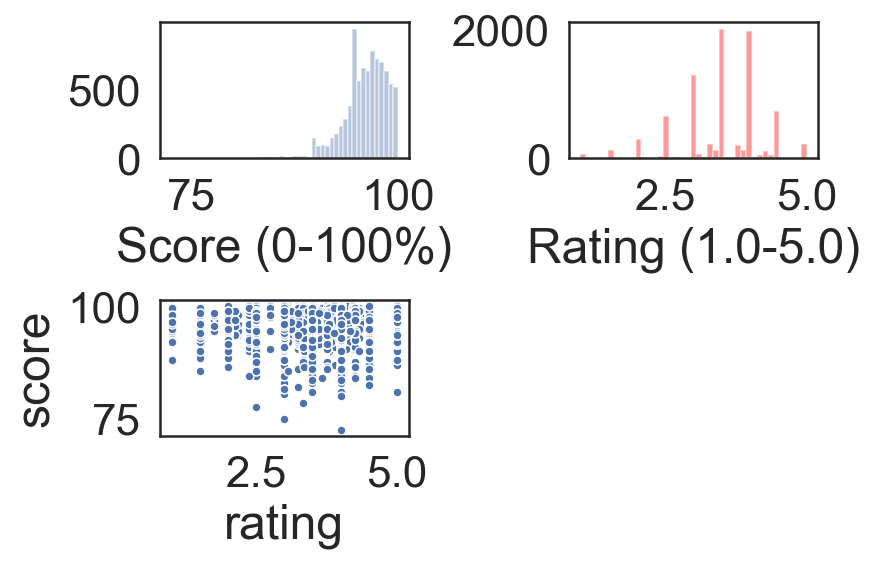

In [14]:
# Looking at relationships between score and rating

print("Fig. 1")
#Variable distribution
plt.subplot(2, 2, 1, autoscale_on = True)
score = pd.Series(df["score"], name = "Score (0-100%)")
sns.distplot(score, norm_hist = False, kde = False)

plt.subplot(2, 2, 2, autoscale_on = True)
rating = pd.Series(df["rating"], name = "Rating (1.0-5.0)")
sns.distplot(rating, color = "red", norm_hist = False, kde = False)

plt.subplot(2, 2, 3, autoscale_on = True)
sns.scatterplot(x = 'rating', y = 'score', data = df, s=20)

plt.tight_layout()

# Linear regression
outcome_1, predictors_1 = patsy.dmatrices('score ~ rating', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

print()
print()

# Finding the SD of rating and score
var_rating = sum([((x - df["rating"].mean()) ** 2) for x in list(df["rating"])]) / len(list(df["rating"])) 
sd_rating = var_rating ** 0.5
var_score = sum([((x - df["score"].mean()) ** 2) for x in list(df["score"])]) / len(list(df["score"])) 
sd_score = var_score ** 0.5

print("Score mean: " + str(df["score"].mean()))
print("Score median: " + str(df["score"].median()))
print("Score mode: " + str(df["score"].mode()))
print("Score SD: " + str(sd_score))
print()
print("Rating mean: " + str(df["rating"].mean()))
print("Rating median: " + str(df["rating"].median()))
print("Rating mode: " + str(df["rating"].mode()))
print("Rating SD: " + str(sd_rating))

##### Fig. 1 EDA: Visualizing the Relationship between inpection score and yelp rating

There are no outlier values. One would intuitively believe that a consumer based rating system would have at least a slight correlation to a professional scoring system. However, from the plots generated above, there is no correlation between these systems. The first plot shows the score distribution as a normal distribution skewed to the right. The second plot shows a slightly more normalized distribution. The mean, median, and modes for the score fall between 96 and 97, while the rating's is 3.5. From the third plot, there does not appear to be a correlation between score and rating. This argument is strengthened by the linear regression results with an R-squared value of 0.001, indicating the score and rating model does not sufficiently explain the variation of the data. 

$$outcome = \beta_0 + \beta_1*predictor.....R-squared = 0.001$$

$$score = 95.7 + 0.088*rating$$

While the yelp scores may not be a good indication of health inspection score, there are other factors that might play a larger role. 


### Fig. 2 EDA: Visualizing the relationship between inpection score, family income, household income, and per capita income

Family Income mean: 84.0602264507743
Family Income median: 85.325
Family Income mode: 0    82.292
dtype: float64
Family Income SD: 23.001344136574602

Household Income mean: 66.76849840444571
Household Income median: 67.392
Household Income mode: 0    67.392
dtype: float64
Household Income SD: 18.522112686024382

Per Capita Income mean: 33.596600756411675
Per Capita Income median: 33.139
Per Capita Income mode: 0    33.139
dtype: float64
Per Capita Income SD: 9.074076796860673


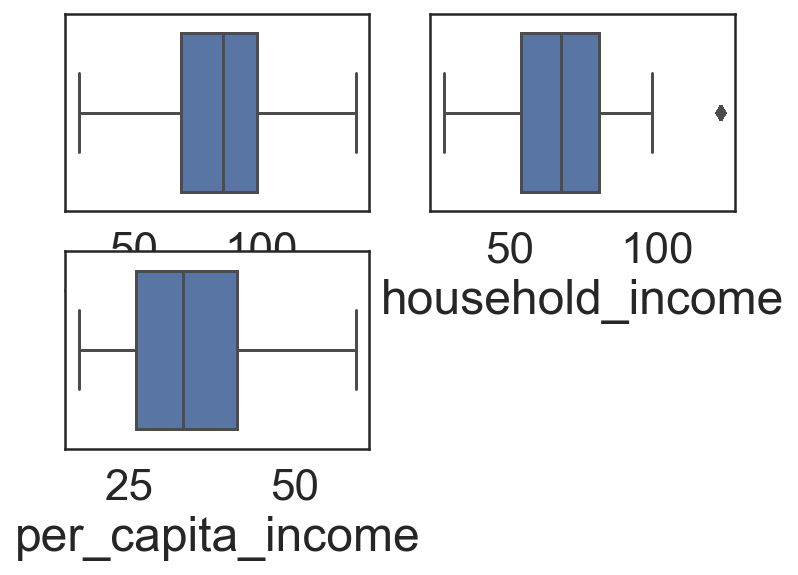

In [15]:
# Finding variation between family income, household income, and per capita income
var_fam = sum([((x - df["family_income"].mean()) ** 2) for x in list(df["family_income"])]) / len(list(df["family_income"])) 
sd_fam = var_fam ** 0.5
var_hou = sum([((x - df["household_income"].mean()) ** 2) for x in list(df["household_income"])]) / len(list(df["household_income"])) 
sd_hou = var_hou ** 0.5
var_cap = sum([((x - df["per_capita_income"].mean()) ** 2) for x in list(df["per_capita_income"])]) / len(list(df["per_capita_income"])) 
sd_cap = var_cap ** 0.5

print("Family Income mean: " + str(df["family_income"].mean()))
print("Family Income median: " + str(df["family_income"].median()))
print("Family Income mode: " + str(df["family_income"].mode()))
print("Family Income SD: " + str(sd_fam))
print()
print("Household Income mean: " + str(df["household_income"].mean()))
print("Household Income median: " + str(df["household_income"].median()))
print("Household Income mode: " + str(df["household_income"].mode()))
print("Household Income SD: " + str(sd_hou))
print()
print("Per Capita Income mean: " + str(df["per_capita_income"].mean()))
print("Per Capita Income median: " + str(df["per_capita_income"].median()))
print("Per Capita Income mode: " + str(df["per_capita_income"].mode()))
print("Per Capita Income SD: " + str(sd_cap))

# Box plot of family income, household income, and per capita income
plt.subplot(2, 2, 1, autoscale_on = True)
sns.boxplot(x = df["family_income"])

plt.subplot(2, 2, 2, autoscale_on = True)
sns.boxplot(x = df["household_income"])

plt.subplot(2, 2, 3, autoscale_on = True)
sns.boxplot(x = df["per_capita_income"])

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.753
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           8.58e-06
Time:                        23:18:03   Log-Likelihood:                -20303.
No. Observations:                8461   AIC:                         4.061e+04
Df Residuals:                    8457   BIC:                         4.064e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            95.8252      0.11

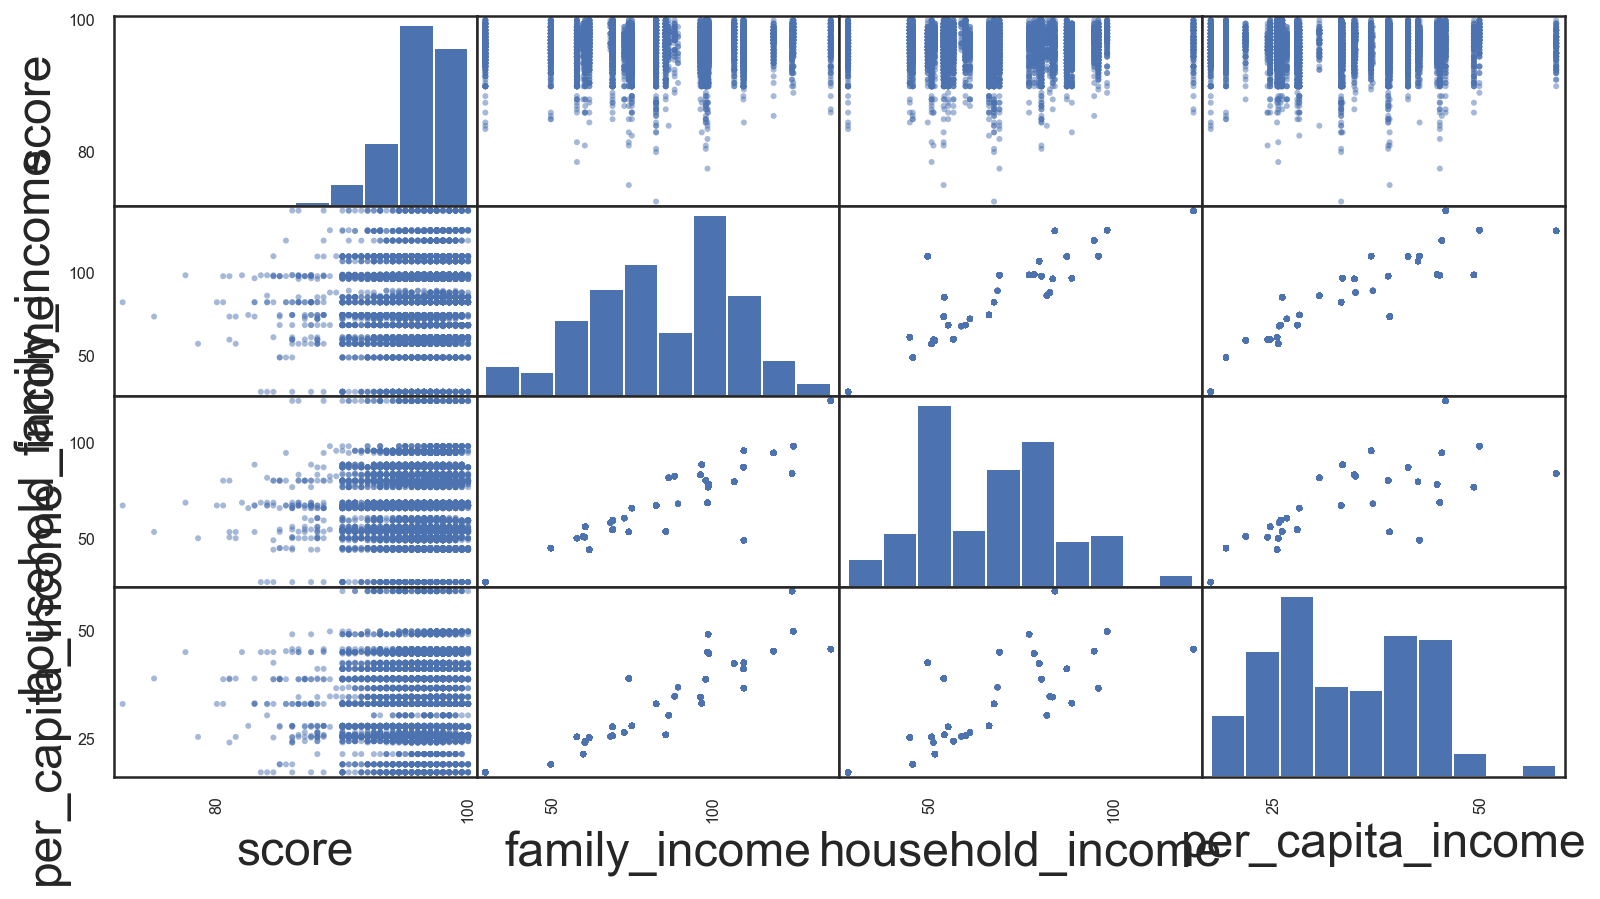

In [16]:

outcome_1, predictors_1 = patsy.dmatrices('score ~ family_income', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
#print(res_1.summary())

outcome_2, predictors_2 = patsy.dmatrices('score ~ household_income', df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
#print(res_2.summary())

outcome_3, predictors_3 = patsy.dmatrices('score ~ per_capita_income', df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
#print(res_3.summary())

outcome_4, predictors_4 = patsy.dmatrices('score ~ family_income + household_income + per_capita_income', df)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

pd.plotting.scatter_matrix(df[["score", 'family_income','household_income', 'per_capita_income']], 
                               figsize=(13, 7));


##### Fig. 2 EDA: Visualizing the Relationship between inpection score, family income, household income, and per capita income

There are no outlier values. The box plots show that the distributions between the variables are similar. All of the variables have a bimodal distribution as seen on the diagonal of the above scatterplots. This type of distribution can be explained by the reason people write online reviews. Typically, people write reviews on positive or negative experiences, leaving less neutral ratings. Relating combinations of income variables, there is a very low correlation between score, family income, household income, and per capita income as demonstrated by the low R-squared values and linear regression shown below. 

$$score = 95.66 + 0.0043*family.income.....R-squared = 0.001$$

$$score = 95.82 + 0.0029*household.income.....R-squared = 0.000$$

$$score = 95.83 + 0.0056*per.capita.income.....R-squared = 0.000$$

$$score = 95.83 + 0.0183*family.income - 0.0103*household.income - 0.0196*per.capita.income.....R-squared = 0.003$$

Looking at the scatterplots comparing the income variables, they seem to have a strong correlation with each other. This makes sense because there are many living situations comprised of families living together. Typically, people with similar financial situations live together. The same reasoning can be applied to per capita income. Per capita income varies more than grouped incomes situations. 


### Fig. 3 EDA: Visualizing the relationship between score and all variables

In [17]:

outcome_1, predictors_1 = patsy.dmatrices('score ~ family_income + household_income + per_capita_income + below_poverty_line + snap_benefits + percent_supplemental_security_income + nonwhite', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
#print(res_1.summary())

outcome_2, predictors_2 = patsy.dmatrices('score ~ below_poverty_line + snap_benefits + percent_supplemental_security_income + nonwhite', df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
#print(res_2.summary())

outcome_3, predictors_3 = patsy.dmatrices('score ~ below_poverty_line + snap_benefits + percent_supplemental_security_income', df)
mod_3 = sm.OLS(outcome_3, predictors_3)
res_3 = mod_3.fit()
#print(res_3.summary())

outcome_4, predictors_4 = patsy.dmatrices('score ~  family_income + household_income + per_capita_income + nonwhite', df)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()
print(res_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     8.869
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           3.84e-07
Time:                        23:18:06   Log-Likelihood:                -20299.
No. Observations:                8461   AIC:                         4.061e+04
Df Residuals:                    8456   BIC:                         4.064e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            96.3270      0.20

##### Fig. 3 EDA and Analysis: Visualizing the relationship between below poverty line, snap benefits, and percent supplemental security income

Here is score prediction equation relating score to various combinations of all the variables: 

$$score = 95.48 + 0.0103*family.income - 0.0017*household.income - 0.0068*per.capita.income + 0.0763*below.poverty.line - 0.0741*snap.benefits + 0.0641*supplemental.security.income - 0.0105*nonwhite.....R-squared = 0.008$$

$$score = 95.97 + 0.0565*below.poverty.line - 0.1062*snap.benefits + 0.1142*supplemental.security.income.....R-squared = 0.004$$

$$score = 96.19 + 0.0649*below.poverty.line - 0.0887*snap.benefits + 0.0927*supplemental.security.income - 0.0121*nonwhite.....R-squared = 0.007$$

Removing below poverty line and snap benefits individually lead to R-squared values of 0.004, together 0.003. Removing supplemental security income had an R-squared of 0.006. Removing nonwhite leads to an R-squared value of 0.004. Removing nonwhite and snap benefits causes the R-squared to fall to 0.000. From this analysis, the nonwhite and snap benefit factors have the largest effect on score. 

Because the incomes are normalized to values below $150,000, all the variables play similar roles in score prediction. The reasoning behind this is the slopes for all the variables are off by a factor of 10 at most. 

I choose a linear regression to connect all the variables because the results from above do not show any correlation between score and the other variables. After a series of trial-and-errors, combining all the variables had the largest R-squared value, leading to the most correlation. The R-squared value is 0.008, which is still very low, but I could not figure out another way to combine various variables to lead to a higher correlation. 


### Fig. 4 PCA on score and predictors

      score    rating  family_income  household_income  per_capita_income  \
0 -0.002922 -0.000985      -0.699691         -0.528128          -0.240562   
1 -0.009617 -0.000550       0.094650          0.462951          -0.001620   
2  0.000700 -0.003993       0.491265         -0.658889           0.485419   
3  0.034748  0.023884       0.264134          0.080764          -0.185891   
4  0.033257  0.000569       0.433452         -0.253496          -0.813557   

   below_poverty_line  snap_benefits  percent_supplemental_security_income  \
0            0.187514       0.166103                              0.050366   
1            0.049376       0.068862                              0.018739   
2            0.057746       0.041475                             -0.008793   
3            0.631784       0.632721                              0.248514   
4           -0.129163      -0.235936                              0.010016   

   nonwhite  
0  0.329158  
1  0.876978  
2  0.289384  
3 -0.161653 

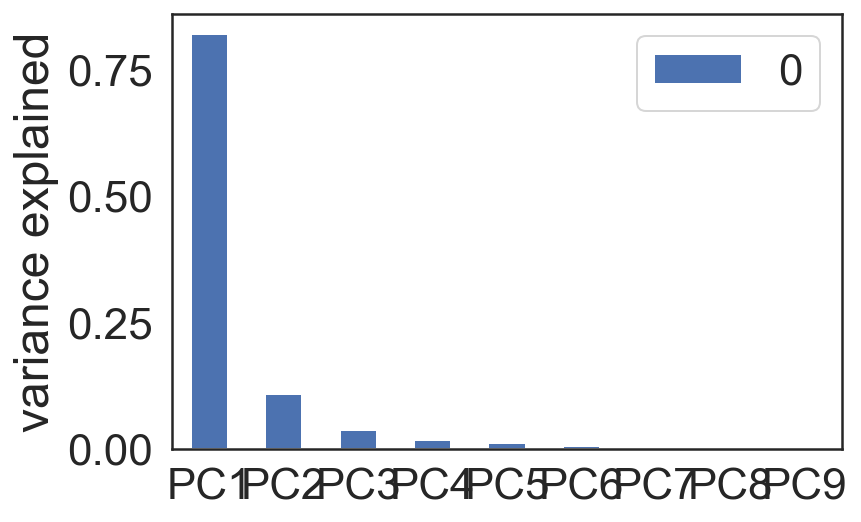

In [18]:

# split data table into predictors and outcome (class labels - species)
predictors = df.iloc[:, 5:14].values

# calculate PCs
pca = PCA(n_components = 9)
pca_fit = pca.fit(predictors)
PCs = pca.fit_transform(predictors)

df_pca = pd.DataFrame(pca_fit.components_, columns=list(df.columns[5:14]))
print(df_pca.head())

var_exp = pd.DataFrame(pca_fit.explained_variance_ratio_,
                       ['PC1', 'PC2', 'PC3', 'PC4', "PC5", "PC6", "PC7", "PC8", "PC9"])
var_exp.plot.bar(rot=0)
plt.ylabel('variance explained');

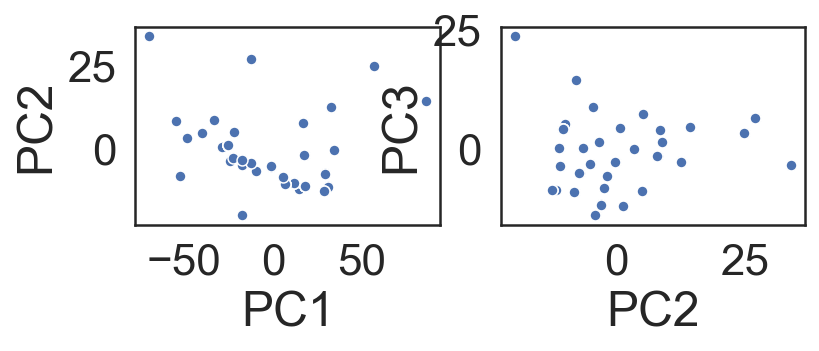

In [19]:
pca_out = pd.DataFrame(PCs, columns=['PC1','PC2','PC3','PC4', "PC5", "PC6", "PC7", "PC8", "PC9"])

plt.subplot(2, 2, 1)
sns.scatterplot(x = 'PC1', y = 'PC2', s = 30, data = pca_out);

plt.subplot(2, 2, 2)
sns.scatterplot(x = 'PC2', y = 'PC3', s = 30, data = pca_out);


##### Fig. 4 PCA on score and predictors

PCA was used to see which variables contributed the most to various PCs. Family income, household income, nonwhite, and per capita income lead to the most variation for PC1,3. Nonwhite and household income contributed to PC2. Snap benefits, below poverty line, family income, and supplemental security income lead to the variation detected in PC4. This makes sense because when a scattermatrix is generated with all the variables, there are clear distinctions between the relationships of the two groups. Family, household, and per capita income had strongly correlated linear regression R-squared value, while the second group had a correlated R-squared value. 

Looking at the second plot of the PC variance explained, PC1 accounts for a majority of the variance between the variables. The other PC components are minute compared to PC1. One would think this would mean the income variables would be the best indicators of the score. However, according to the linear regression results from Fig. 3, all the income related variables play a small role in correlation, while nonwhite and snap benefits play the largest role. 


### Fig. 5 EDA: Visualizing the socioeconomic variable distributions

                            OLS Regression Results                            
Dep. Variable:          family_income   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 3.524e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:18:08   Log-Likelihood:                -29087.
No. Observations:                8461   AIC:                         5.818e+04
Df Residuals:                    8458   BIC:                         5.820e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5848      0.33

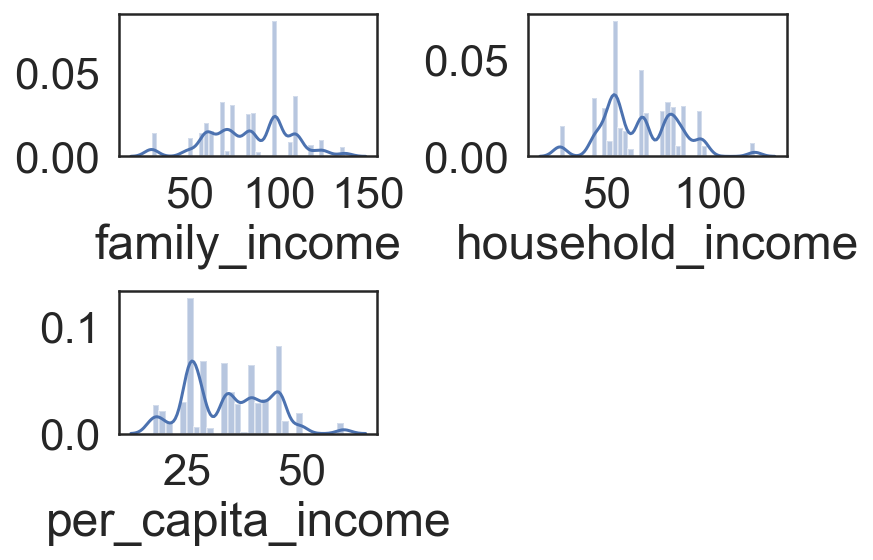

In [20]:
plt.subplot(2, 2, 1)
sns.distplot(df["family_income"])

plt.subplot(2, 2, 2)
sns.distplot(df["household_income"])

plt.subplot(2, 2, 3)
sns.distplot(df["per_capita_income"])

plt.tight_layout()

outcome_1, predictors_1 = patsy.dmatrices('family_income ~ household_income + per_capita_income', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())


                            OLS Regression Results                            
Dep. Variable:     below_poverty_line   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                 2.287e+04
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        23:18:09   Log-Likelihood:                -18953.
No. Observations:                8461   AIC:                         3.791e+04
Df Residuals:                    8457   BIC:                         3.794e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


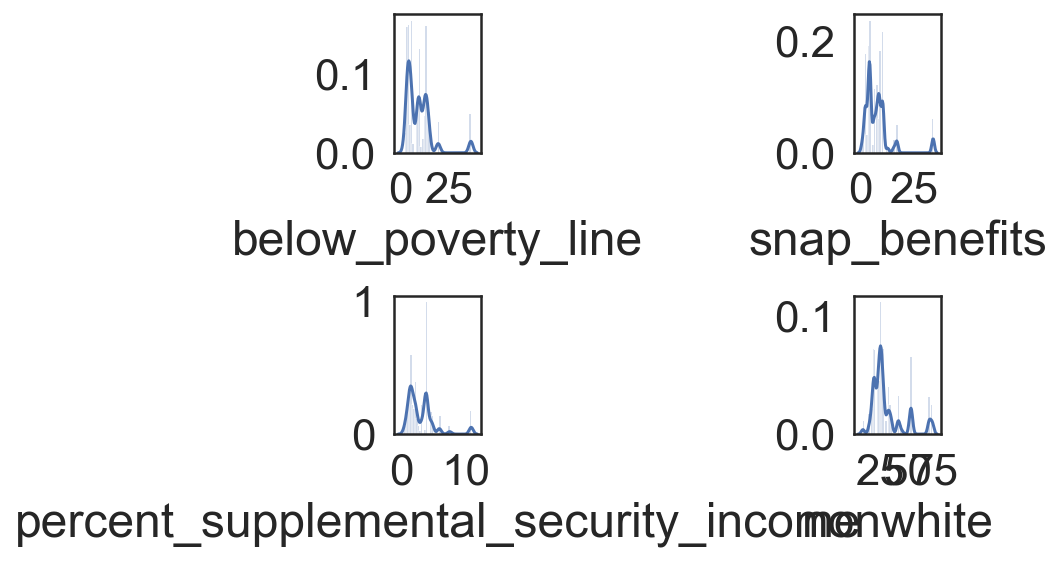

In [21]:
plt.subplot(2, 2, 1)
sns.distplot(df["below_poverty_line"])

plt.subplot(2, 2, 2)
sns.distplot(df["snap_benefits"])

plt.subplot(2, 2, 3)
sns.distplot(df["percent_supplemental_security_income"])

plt.subplot(2, 2, 4)
sns.distplot(df["nonwhite"])

plt.tight_layout()

outcome_2, predictors_2 = patsy.dmatrices('below_poverty_line ~ snap_benefits + percent_supplemental_security_income + nonwhite', df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()
print(res_2.summary())


##### Fig. 5 EDA: Visualizing the socioeconomic variable distributions

It is clear from the above plots that the distributions of the socioeconomic factors have a significant variation. The plots were separated by their distribution types.

The distributions of family, household, and per capita income can be described with a combination of a normal and uniform distribution. There are outliers on both extremes, causing the kernel density estimation (KDE) to be lower. There is one peak in each plot skewing the data to the left or right. These data are highly correlated because they have similar distributions.  

$$family.income  = -1.5848 + 0.6659*household.income - 1.2259*per.capita.income.....R-squared = 0.893$$

The below poverty line, snap benefits, supplemental security income, and nonwhite percentage data all have normal distributions skewed to the left. Each variable has outliers on the far right. These data are also highly correlated because they have similar distributions. 

$$below.poverty.line = 0.7685 + 0.9784*snap.benefits - 0.0013*supplemental.security.income + 0.0303*nonwhite.....R-squared = 0.890$$


# Ethics & Privacy

For this project, only the provided data was used. The restaurant food inspection results are publicly available online. Yelp reviews are also public. The data on the statistics are also publicly known. All the data analyzed was used with proper permission. The purpose of this project is to find relationships between the previously stated data. The findings for this project will not be used for any other purpose other than this course, so there should not be any problems of misuse. There are no forseeable privacy concerns with the datasets because all the data is public. There are potential biases in the dataset. This project is baised against restaurants that do not have online yelp reviews. A possible reason for this is because those types of restaurants may not be as popular or are located in low traffic areas. All the ratings across the yelp reviews were averaged, so restaurants with very little reviews have a higher chance of being inaccurate because the ratings are based on a small sample size. 

Due to the nature of analyzing socioeconomic and ethnic factors, there is a potential for discimination due to these results. This project was carried out without the purpose of targetting groups of people or individual restaurants and is solely for the purpose of understanding correlations between these different factors of inspection scores. If a disparity were to be found, then this study provides evidence as a reason to strive to solve these problems in restaurants. I tried to minimize the effects of these biases and privacy concerns. One way I minimized the bias of the data was by only removing empty rows and exluding data that did not have common addresses and zipcodes in each of the datasets. I minimized privacy concerns by making it clear that these results do not say anything about the nature of the subgroups but rather solely show correlation. 

# Conclusion & Discussion

The purpose of this project is to make the restaurant health inspection process more efficient. I explored the effects of different socioeconomic factors on health inspection score to see which combinations would lead to the best score prediction. If a correlation is to be found, then certain restaurants with a predicted higher score could have longer durations before their next inspection and restaurants with lower scores can be focused on improvement. This would allow the general inspection process to be more efficient in terms of allocating resources and generating higher inspection scores all around. However, the main conclusion from this analysis has been socioeconomic factors are not enough to predict inspection scores. The data analyzed consists of inspection results from various restaurants in North Carolina cities, where inspection score, zipcodes, and addresses were utilized. Yelp ratings were used along with zipcodes and addresses for cross-checking with the inspection data. Socioeconomic factors related to zipcodes were added to the dataset, grouping the restaurant inspection data by zipcode. This data was analyzed via linear regression and principle component analysis. Linear regression was used to find correlations between the different variables and discover which combinations of variables lead to high correlations. PCA was used to see which variables contributed the most to the variation of the dataset. 

According to Fig. 1, there is little correlation between inspection score and yelp rating. This might be due to the bimodal nature of online reviews. The inspection score has a skewed right normal distribution, so comparing data with different types of distributions will be less likely to lead to correlated results. From this, relationships between score and family, household, and per capita incomes were compared. These comparisons lead to poor correlations (Fig. 2). The remaining socioeconomic factors were analyzed with respect to the score and similar results were discovered (Fig. 3). Out of all the socioeconomic factors, nonwhite and snap benefit had the largest impact on the score. PCA was run on all the variables to see which lead to the most variation. Generally, income and nonwhite had the largest effect on variation, affecting PC1 the most (Fig. 4). The rest of the factors were included by PC4. I am not sure why the variables with the lowest correlation lead to the highest variance. However, the reason behind the poor correlation results overall is seen in Fig. 5. The income data has peaks leading to a skewed uniform distribution, and the other factors have a left skewed normal distribution. When compared to the score's right skewed normal distribution, low R-squared values make sense because the data being compared have different distributions. 

Overall, the analysis of the inspection data did not lead to significant results. This was caused by the limitation of not having a solid understanding of the data before analyzing it. The question and hypothesis were based on an assumption that correlations would be found. This can be fixed in future projects by fulling understanding the distributions of each potential variable and formulating an intelligent questioned based on those initial findings. Another limitation that I faced was the fear of having too little data to analyze. After cleaning the data, the yelp and inspection datasets had less than have the data as the original files. Because there were no obvious outliers when initially scanning the data along with the fear of not having enough data, no outliers were removed. This may have been a mistake especially for the income data because the outliers lead to a more spread out distribution when a more normalized one would have been better. Data analytics is rising in popularity. The advancements and need for computational power is driving computer scientists to create more efficient algorithms for predictive analytics. Generating models for health inspection score seems like a simple task, but there are an infinite number of factors that play a role in any human behavior based model. 